<a href="https://colab.research.google.com/github/Ash2809/CodSoft/blob/main/sms_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM, Bidirectional, Embedding, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
dataset = pd.read_csv(r"/content/drive/MyDrive/CodSoft/SMS_CLASSIFIER/spam.csv", encoding='latin1')
dataset.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [5]:
dataset = dataset.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
dataset.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [6]:
dataset.columns = ["label", "sms"]

In [7]:
dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})
dataset.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='label', ylabel='count'>

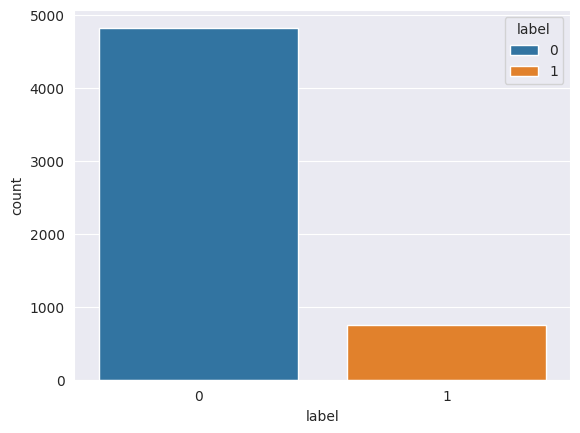

In [8]:
sns.set_style("darkgrid")
sns.countplot(data = dataset, x= "label", hue = "label")

In [9]:
from sklearn.utils import resample

majority = dataset[dataset.label == 0]
minority = dataset[dataset.label == 1]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)


dataset_balanced = pd.concat([majority, minority_upsampled])


<Axes: xlabel='label', ylabel='count'>

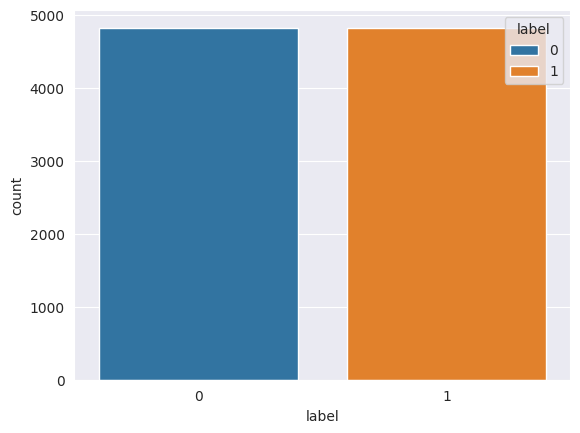

In [10]:
sns.set_style("darkgrid")
sns.countplot(data = dataset_balanced, x= "label", hue = "label")

In [11]:
dataset_balanced.shape

(9650, 2)

In [12]:
dataset_balanced.isnull().sum()

,0
label,0
sms,0


In [13]:
def preprocess(text):
  text = text.lower()
  text = text.translate(str.maketrans("","",string.punctuation))
  stopwords_set = set(stopwords.words("english"))
  stemmer = PorterStemmer()

  text = " ".join(stemmer.stem(word) for word in text.split() if word not in stopwords_set)
  return text

In [14]:
dataset_balanced["sms"] = dataset_balanced["sms"].apply(preprocess)
dataset_balanced.head()

,label,sms
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though
6,0,even brother like speak treat like aid patent


In [15]:
X = dataset_balanced["sms"]
Y = dataset_balanced['label']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7720, 8038), (1930, 8038), (7720,), (1930,))

Training Accuracy: 0.9998704663212435
Testing Accuracy: 0.9979274611398964
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930

Confusion Matrix


<Axes: >

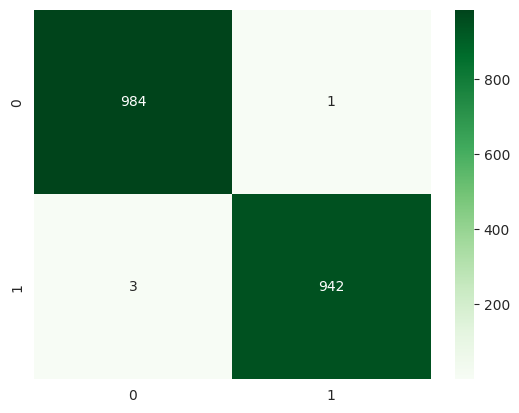

In [ ]:
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
test_acc = model.score(x_test,y_test)
train_acc = model.score(x_train,y_train)
classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
sns.heatmap(data = cm, annot = True,cmap = "Greens",fmt = "d")

Training Accuracy: 0.8856217616580311
Testing Accuracy: 0.883419689119171
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       985
           1       0.93      0.83      0.87       945

    accuracy                           0.88      1930
   macro avg       0.89      0.88      0.88      1930
weighted avg       0.89      0.88      0.88      1930

Confusion Matrix


<Axes: >

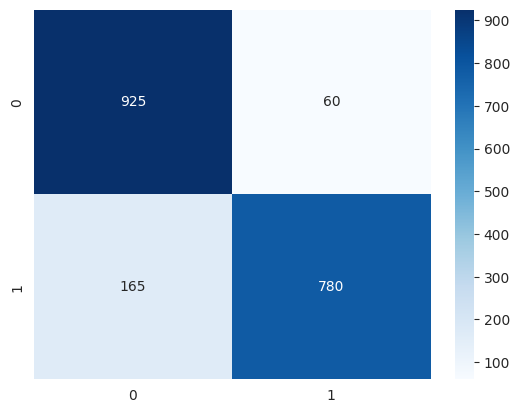

In [ ]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
test_acc = model.score(x_test,y_test)
train_acc = model.score(x_train,y_train)
classification_rep = classification_report(y_test, y_pred)

cm1 = confusion_matrix(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
# print()
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
sns.heatmap(data = cm1, annot = True,cmap = "Blues", fmt = "d")

Training Accuracy: 0.9874352331606218
Testing Accuracy: 0.9818652849740933
F1 Score:  0.981549815498155
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       985
           1       0.98      0.99      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

Confusion Matrix


<Axes: >

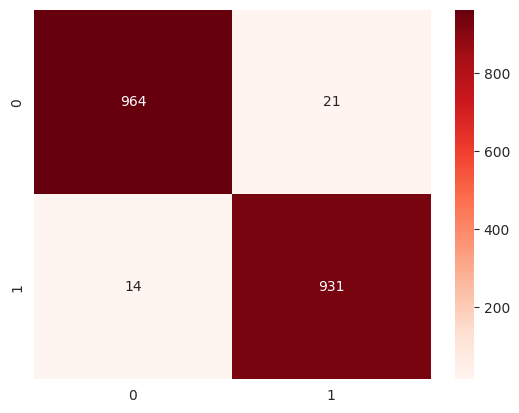

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
test_acc = model.score(x_test,y_test)
train_acc = model.score(x_train,y_train)
classification_rep = classification_report(y_test, y_pred)

cm1 = confusion_matrix(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score: ",f1_score(y_test, y_pred))
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
sns.heatmap(data = cm1, annot = True,cmap = "Reds", fmt = "d")

USING LSTM

In [20]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(dataset_balanced["sms"])

X2 = tokenizer.texts_to_sequences(dataset_balanced["sms"])

In [21]:
X2 = pad_sequences(X2,padding = "post")
X2[0]

array([  14, 4807,  199,  464,  772, 2358,   97,  114,  484, 2359,  179,
       3992, 2360,   53, 4808,  190,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [22]:
Y2 = dataset_balanced["label"]

In [23]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8098

In [37]:
nn = Sequential()
nn.add(Embedding(input_dim = vocab_size,output_dim = 100))

nn.add(Bidirectional(LSTM(units = 128,return_sequences=True)))
nn.add(Bidirectional(LSTM(units = 64,return_sequences=False)))

nn.add(Dense(units = 128, activation = "relu"))
nn.add(Dropout(0.3))

nn.add(Dense(units = 64, activation = "relu"))
nn.add(Dropout(0.3))

nn.add(Dense(units = 1, activation = "sigmoid"))

nn.compile(optimizer = "Adam", metrics= ["Accuracy"], loss = "binary_crossentropy")

In [38]:
nn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
nn.fit(x = X2, y = Y2, epochs=5,validation_split = 0.2)

Epoch 1/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - Accuracy: 0.8693 - loss: 0.2730 - val_Accuracy: 0.9829 - val_loss: 0.0848
Epoch 2/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - Accuracy: 0.9985 - loss: 0.0073 - val_Accuracy: 0.9891 - val_loss: 0.0487
Epoch 3/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - Accuracy: 0.9995 - loss: 0.0025 - val_Accuracy: 0.9907 - val_loss: 0.0631
Epoch 4/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - Accuracy: 0.9985 - loss: 0.0053 - val_Accuracy: 0.9969 - val_loss: 0.0221
Epoch 5/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.9997 - loss: 0.0023 - val_Accuracy: 0.9922 - val_loss: 0.0579


In [40]:
y_pred2 = nn.predict(Y2)

302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [43]:
for i in range(0,len(y_pred2)):
  if y_pred2[i] >= 0.5:
    y_pred2[i] = 1
  else:
    y_pred2[i] = 0

In [46]:
f1_score(Y2, y_pred2)*100

100.0

<Axes: >

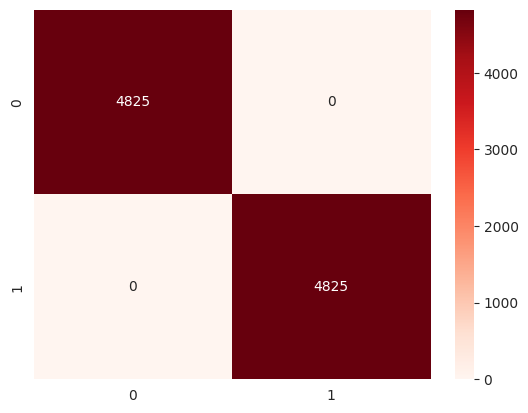

In [47]:
cmm = confusion_matrix(Y2, y_pred2)
sns.heatmap(data = cmm, cmap = "Reds",annot = True, fmt = "d")

In [52]:
def convert(text):
  text = text.lower()
  text = text.translate(str.maketrans("","",string.punctuation))
  stopwords_set = set(stopwords.words("english"))
  stemmer = PorterStemmer()

  text = " ".join(stemmer.stem(word) for word in text.split() if word not in stopwords_set)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text)
  vectors = tokenizer.texts_to_sequences(text)
  vectors = pad_sequences(vectors,padding = "post")

  return vectors

In [53]:
text = "Free entry in 2 a wkly comp to win FA Cup"
vectors = convert(text)

response = nn.predict(vectors)
if response[0][0] >= 0.5:
  print("SPAM")
else:
  print("HAM")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
SPAM
